In [1]:
%%html
<!-- Run this block to add CSS styles into this Notebook. -->
<style>
.alert-info {
    color: #000000 !important;
    background-color: #FFFFFF !important;
}
</style>

# Plotting Examples

In [2]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Create sample data
numdays = 30
dates = [datetime.today() - timedelta(days=x) for x in range(numdays)]
stock1 = np.random.normal(10, 1.0, numdays)
stock2 = np.random.normal(100, 20.0, numdays)
stock3 = np.random.normal(50, 9.0, numdays)
stock4 = np.random.normal(300, 55.0, numdays)
df = pd.DataFrame(data={'stock1': stock1, 'stock2': stock2, 'stock3': stock3, 'stock4': stock4}, index=dates).sort_index(ascending=True)
df.head(5)

,stock1,stock2,stock3,stock4
2020-01-30 00:11:58.103805,11.810477,93.056874,43.500813,372.948308
2020-01-31 00:11:58.103800,11.516052,64.386384,67.192594,377.212201
2020-02-01 00:11:58.103796,8.920117,109.969401,59.804726,239.252047
2020-02-02 00:11:58.103791,11.497228,113.002173,33.889590,252.718202
2020-02-03 00:11:58.103786,8.437736,150.580032,45.936872,267.335175


## 1. Line Chart

https://stackoverflow.com/questions/43482191/matplotlib-axes-plot-vs-pyplot-plot

### 1.1. Line chart with vanilla Matplotlib

Single plot:

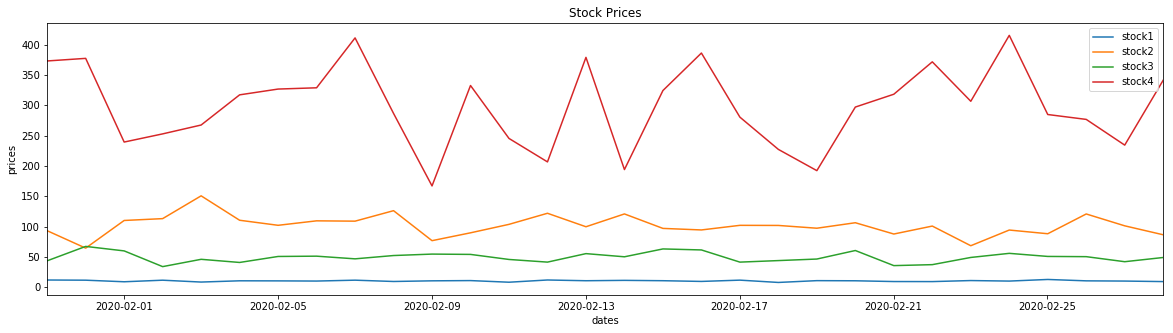

In [3]:
fig = plt.figure(figsize=(20,5))
plt.plot(df.index, df['stock1'])
plt.plot(df.index, df['stock2'])
plt.plot(df.index, df['stock3'])
plt.plot(df.index, df['stock4'])
plt.legend() # Show legend
plt.title("Stock Prices")
plt.xlabel('dates')
plt.ylabel('prices')
plt.margins(x=0) # Removes left and right paddings

plt.show();

Multiple plots:

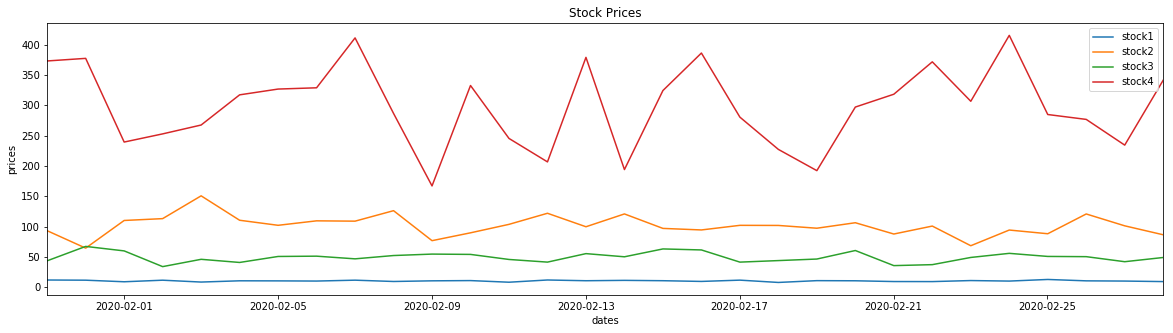

In [4]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(df.index, df['stock1'])
ax.plot(df.index, df['stock2'])
ax.plot(df.index, df['stock3'])
ax.plot(df.index, df['stock4'])
ax.legend() # Show legend
ax.set_title("Stock Prices")
ax.set_xlabel('dates')
ax.set_ylabel('prices')
ax.margins(x=0) # Removes left and right paddings

plt.show();

### 1.2. Line chart from pandas.DataFrame

The documentation of plot arguments is available [here](https://github.com/pandas-dev/pandas/blob/v0.25.3/pandas/plotting/_core.py#L504-L1533).

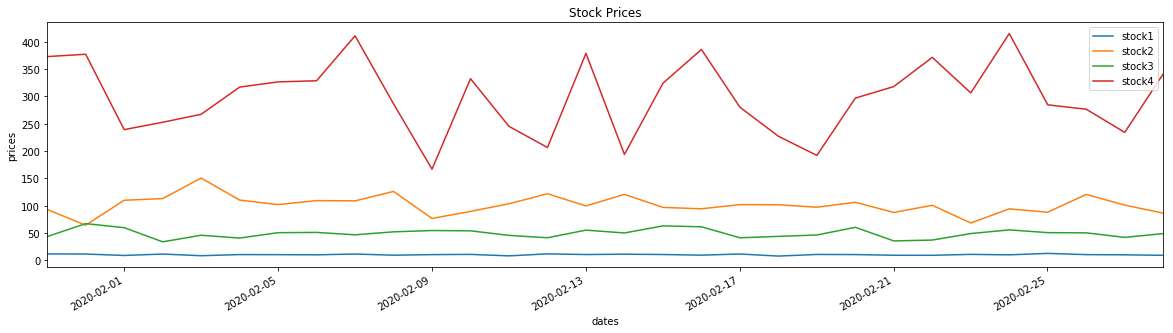

In [5]:
ax = df.plot(figsize=(20,5), title='Stock Prices')
ax.set_xlabel('dates')
ax.set_ylabel('prices');

## 2. Bar Chart

For the purpose of this exercise, we will divide the data into four weeks, cutting off the earliest dates (i.e. since we have 30 days, we get 28 days of them, divided into 4 weeks).



In [6]:
weekdata = pd.DataFrame
weeks = []
for i in range(4):
    start = i*7
    end = (i+1)*7 - 1
    weeks.append(df.loc[df.index[start]:df.index[end]].mean(axis=0))

We will first plot the values of a single week with a simple bar chart, then we will draw a grouped bar chart to visualize the whole dataset.

Also, for these bar charts, we will plot them directly with `plt` instead of `ax` objects.

### 2.1. Single bar chart with vanilla Matplotlib

Plot the last week's mean prices.

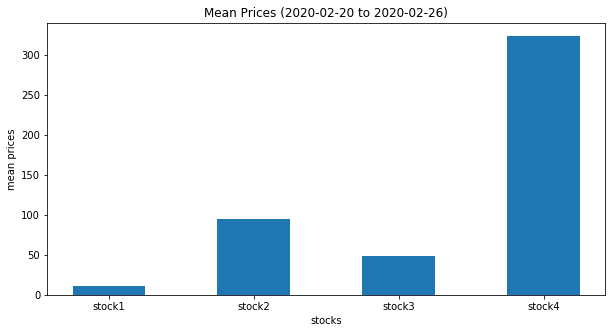

In [7]:
fig = plt.figure(figsize=(10,5))
labels = weeks[-1].index
x = np.arange(len(labels))
width=0.5
title = "Mean Prices ({} to {})".format(df.iloc[start].name.strftime("%Y-%m-%d"), df.iloc[end].name.strftime("%Y-%m-%d"))

plt.bar(x, weeks[-1], width)
plt.xticks(x, labels)
plt.title(title)
plt.xlabel('stocks')
plt.ylabel('mean prices')

plt.show();

### 2.2. Single bar chart from pandas.DataFrame

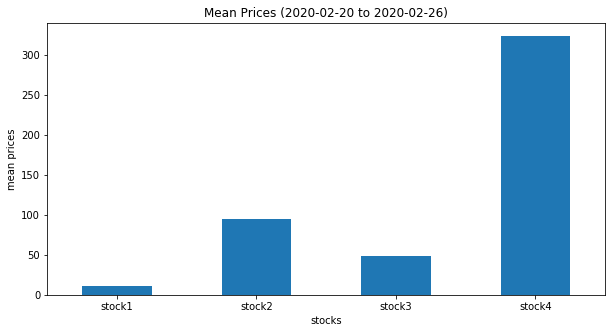

In [8]:
weeks[-1].plot.bar(figsize=(10,5), rot=0, title=title, width=0.5)
plt.xlabel('stocks')
plt.ylabel('mean prices');

### 2.3. Dodged bar chart with vanilla Matplotlib

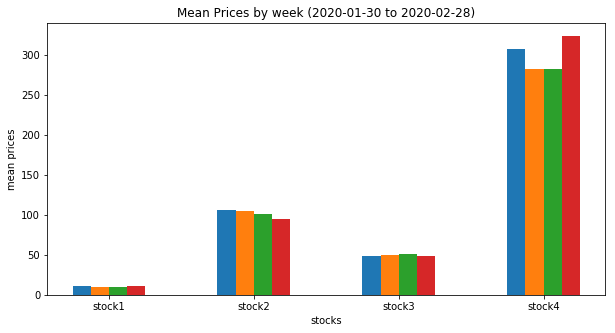

In [9]:
num_weeks = 4
fig = plt.figure(figsize=(10,5))
labels = weeks[0].index
title = "Mean Prices by week ({} to {})".format(df.iloc[0].name.strftime("%Y-%m-%d"), df.iloc[-1].name.strftime("%Y-%m-%d"))
x = np.arange(len(labels))
width=0.5/num_weeks

plt.bar(x - 3 * width/2, weeks[0], width, label="week1")
plt.bar(x - width/2, weeks[1], width, label="week2")
plt.bar(x + width/2, weeks[2], width, label="week3")
plt.bar(x + 3 * width/2, weeks[3], width, label="week4")

plt.xticks(x, labels)
plt.title(title)
plt.xlabel('stocks')
plt.ylabel('mean prices')

plt.show();

### 2.4. Dodged bar chart from pandas.DataFrame

Note that you can use `ax` instead of `plt` here too (remember the difference between drawing on a figure and drawing on an axes).

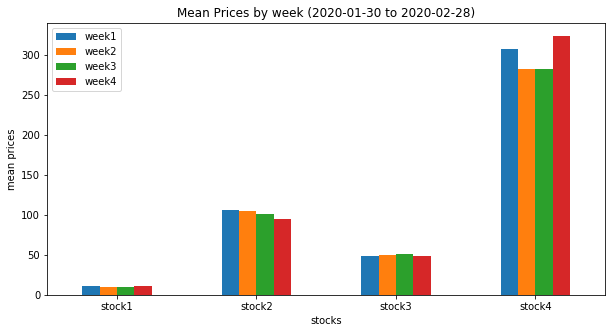

In [10]:
labels = weeks[0].index
grouped_df = pd.DataFrame({'week1': weeks[0].values,
                           'week2': weeks[1].values,
                           'week3': weeks[2].values,
                           'week4': weeks[3].values}, index=labels)
grouped_df.plot.bar(figsize=(10,5), rot=0, title=title)
plt.xlabel('stocks')
plt.ylabel('mean prices');

### 2.5. Stacked bar chart with vanilla Matplotlib

It does not make much sense to plot these data this way, but let's do it anyway to demonstrate drawing a stacked bar chart with Matplotlib.

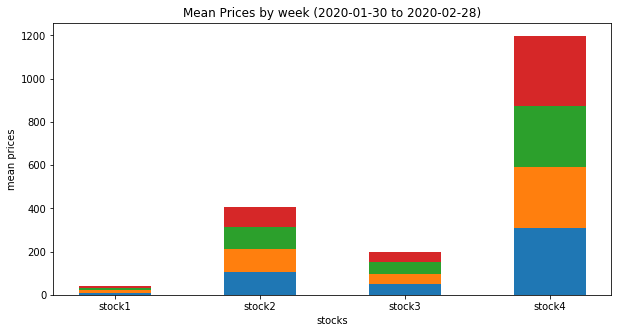

In [11]:
num_weeks = 4
fig = plt.figure(figsize=(10,5))
labels = weeks[0].index
title = "Mean Prices by week ({} to {})".format(df.iloc[0].name.strftime("%Y-%m-%d"), df.iloc[-1].name.strftime("%Y-%m-%d"))
x = np.arange(len(labels))
width=0.5

p1 = plt.bar(x, weeks[0], width, label="week1")
p2 = plt.bar(x, weeks[1], width, label="week2", bottom=weeks[0])
p3 = plt.bar(x, weeks[2], width, label="week3", bottom=weeks[0]+weeks[1])
p4 = plt.bar(x, weeks[3], width, label="week4", bottom=weeks[0]+weeks[1]+weeks[2])

plt.xticks(x, labels)
plt.title(title)
plt.xlabel('stocks')
plt.ylabel('mean prices')

plt.show();

### 2.6. Stacked bar chart from pandas.DataFrame

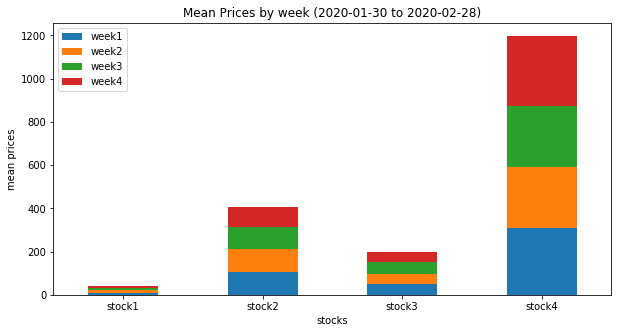

In [12]:
labels = weeks[0].index
grouped_df = pd.DataFrame({'week1': weeks[0].values,
                           'week2': weeks[1].values,
                           'week3': weeks[2].values,
                           'week4': weeks[3].values}, index=labels)
grouped_df.plot.bar(figsize=(10,5), rot=0, title=title, stacked=True)
plt.xlabel('stocks')
plt.ylabel('mean prices');

## 3. Histogram

Histogram is extremely useful for measuring the distribution of values. Let's create a mock-up returns dataset. The values are generally small percentages.

In [13]:
numdays = 300
dates = [datetime.today() - timedelta(days=x) for x in range(numdays)]
returns = np.random.normal(0.0, 0.05, numdays)
ret_df = pd.DataFrame(data={'return': returns}, index=dates).sort_index(ascending=True)
ret_df.head(5)

,return
2019-05-05 00:12:00.659727,-0.001345
2019-05-06 00:12:00.659722,0.101773
2019-05-07 00:12:00.659718,-0.002072
2019-05-08 00:12:00.659713,-0.027396
2019-05-09 00:12:00.659709,0.003745


### 3.1. Histogram with vanilla Matplotlib

When creating histograms, we need to pass in the number of bins to divide the distribution into.

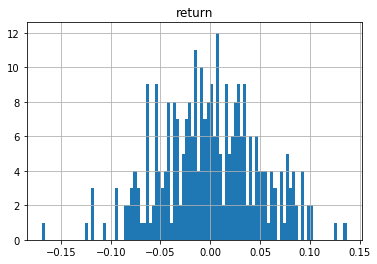

In [14]:
fig = plt.figure()
bins = 100
plt.hist(ret_df['return'], bins)
plt.grid(True)
plt.title('return');

### 3.2. Histogram from pandas.DataFrame

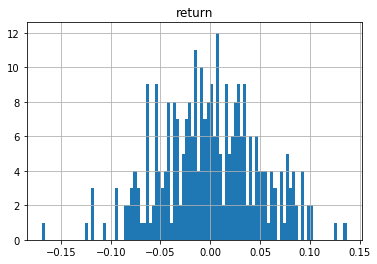

In [15]:
ret_df.hist(bins=100);

## 4. Scatterplot

We use scatterplots to visualize the relationship between two variables. The closer to 45-degree the trend is, the more these two variables are strongly correlated. We will talk more about this in the coming lessons. For now, take a look at how we can plot a scatterplot either through Matplotlib or directly from a pandas DataFrame object.

In this plot, we will visualize the returns of 1-day prior and the current day based on the `ret_df` DataFrame we have created above.

Just for kicks, we will also create a dataset of two variables that are strongly correlated. In fact, one variable is created by doubling the value of the other variable then add by small random values. We will plot both DataFrames in a facet grid to show how they differ.

In [16]:
# Data preparation. Get `day-1` returns
print("Today's returns")
print(ret_df.head(5))
yst_ret_df = ret_df.shift(1)
print("\nYesterday's returns")
print(yst_ret_df.head(5))
cor1_df = pd.DataFrame(data={'cur_return': ret_df['return'].values, 'yst_return': yst_ret_df['return'].values}, index=ret_df.index)

# Create a DataFrame with highly correlated variables
numdays = 300
var1 = np.random.normal(0.0, 0.05, numdays)
var2 = var1 * 2 + np.random.normal(0.0, 0.02, numdays)
cor2_df = pd.DataFrame(data={'var1': var1, 'var2': var2})

Today's returns
                              return
2019-05-05 00:12:00.659727 -0.001345
2019-05-06 00:12:00.659722  0.101773
2019-05-07 00:12:00.659718 -0.002072
2019-05-08 00:12:00.659713 -0.027396
2019-05-09 00:12:00.659709  0.003745

Yesterday's returns
                              return
2019-05-05 00:12:00.659727       NaN
2019-05-06 00:12:00.659722 -0.001345
2019-05-07 00:12:00.659718  0.101773
2019-05-08 00:12:00.659713 -0.002072
2019-05-09 00:12:00.659709 -0.027396


### 4.1. Scatterplots with Matplotlib

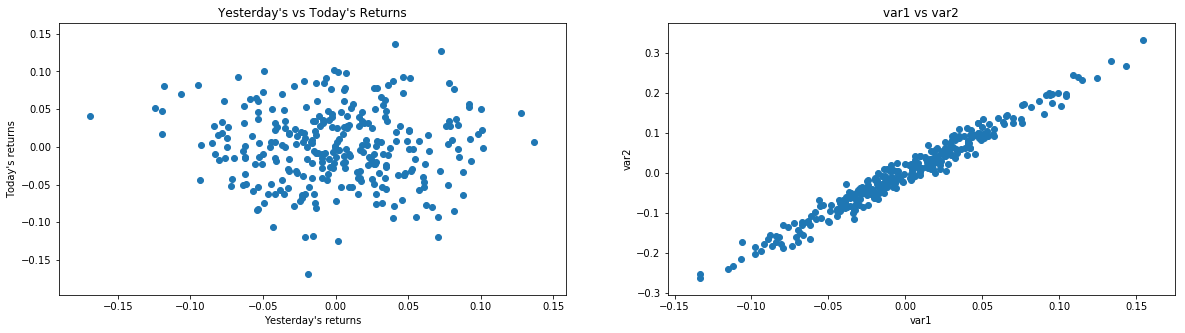

In [17]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(cor1_df['yst_return'], cor1_df['cur_return'])
ax1.set_title("Yesterday's vs Today's Returns")
ax1.set_xlabel("Yesterday's returns")
ax1.set_ylabel("Today's returns")
ax2 = fig.add_subplot(1,2,2)
ax2.scatter(cor2_df['var1'], cor2_df['var2'])
ax2.set_title("var1 vs var2")
ax2.set_xlabel("var1")
ax2.set_ylabel("var2");

See how strongly correlated variables have a completely different distribution to non-correlated variables.

### 4.2. Scatterplots from pandas.DataFrame

<div class="alert alert-info">
    It is important to note here that <code>ax</code> argument can be used when calling <code>pandas.DataFrame.plot*</code> to create the plot in a specific Axes.
</div>

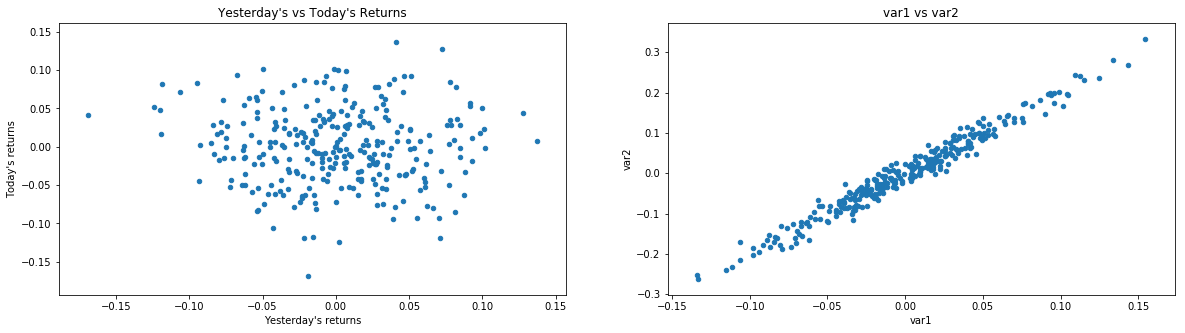

In [18]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1,2,1)
# Pass `ax` argument to create a plot in that axes:
ax1 = cor1_df.plot.scatter(x='yst_return', y='cur_return', ax=ax1)
ax1.set_title("Yesterday's vs Today's Returns")
ax1.set_xlabel("Yesterday's returns")
ax1.set_ylabel("Today's returns")
ax2 = fig.add_subplot(1,2,2)
ax2 = cor2_df.plot.scatter(x='var1', y='var2', ax=ax2)
ax2.set_title("var1 vs var2")
ax2.set_xlabel("var1")
ax2.set_ylabel("var2");

## 5. Facet Grid

We have seen some examples of facet grids in action in the "Scatterplot" section above. One thing I'd like to add here is that, other than adding subplots and pass the create axes to `pandas.DataFrame.plot*` initialization, some plots also have an inherent facet grid presentation. In this example below, we plot directly from a DataFrame that contains the returns of 4 stocks. 

In [19]:
# Data preparation. Create 300-days random returns for 4 stocks.
numdays = 300
dates = [datetime.today() - timedelta(days=x) for x in range(numdays)]
stock1 = np.random.normal(0.01, 0.04, numdays)
stock2 = np.random.normal(0.02, 0.03, numdays)
stock3 = np.random.normal(0.03, 0.02, numdays)
stock4 = np.random.normal(0.04, 0.01, numdays)
mret_df = pd.DataFrame(data={'stock1': stock1, 'stock2': stock2, 'stock3': stock3, 'stock4': stock4}, index=dates).sort_index(ascending=True)
mret_df.head(5)

,stock1,stock2,stock3,stock4
2019-05-05 00:12:02.415048,0.005513,0.053016,0.004628,0.029222
2019-05-06 00:12:02.415038,-0.034887,0.042834,0.038737,0.050694
2019-05-07 00:12:02.415028,-0.012343,0.018369,0.057153,0.049382
2019-05-08 00:12:02.415018,-0.034218,0.014835,0.036115,0.045740
2019-05-09 00:12:02.415009,0.049872,0.062181,0.063426,0.033827


### 5.1. Multiple histograms directly from pandas.DataFrame

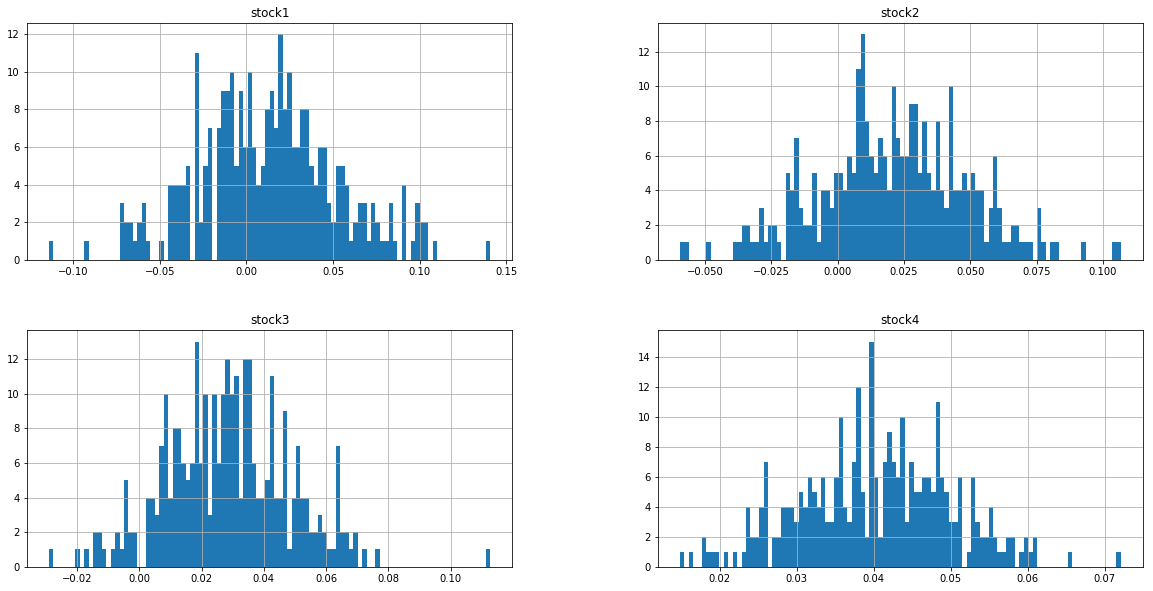

In [20]:
mret_df.hist(bins=100, figsize=(20, 10));

## 6. Legend

Sometimes you may want to draw your own legend. This is the case when you have a custom-made plot that may require you to draw on an Axes manually. The code below demonstrate how you can add elements and position your legend on an Axes.

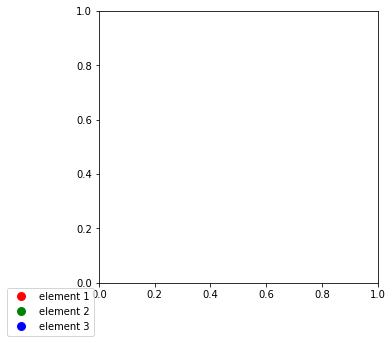

In [21]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1,1,1)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w',
               label='element 1',
               markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w',
               label='element 2',
               markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w',
               label='element 3',
               markerfacecolor='blue', markersize=10)
]
ax1.legend(handles=legend_elements, bbox_to_anchor=(0, 0))

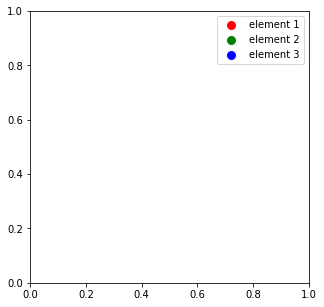

In [22]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1,1,1)
ax1.legend(handles=legend_elements, bbox_to_anchor=(1, 1));

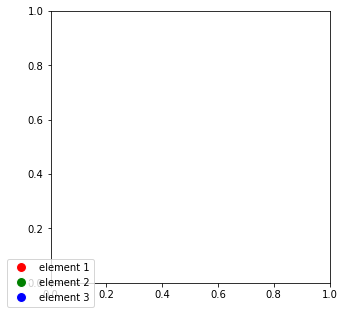

In [23]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1,1,1)
ax1.legend(handles=legend_elements, bbox_to_anchor=(0, 0), loc='center');

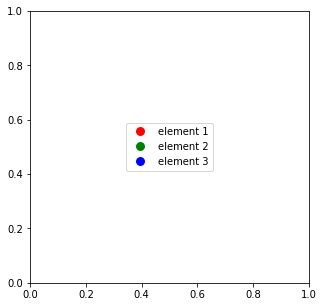

In [24]:
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1,1,1)
ax1.legend(handles=legend_elements, bbox_to_anchor=(0.5, 0.5), loc='center');

## 7. Conclusion

As you see, in all of the cases, plotting directly from pandas DataFrame object significantly reduces the length of code needed to draw the plots, many times to a single line.

Therefore, wherever possible, draw your plots from pandas DataFrame object. In Project 1 you will get the opportunity to use what you have learned in the above exercises. Good luck, and have fun!